In [ ]:
# Uses the baby names dataset from Kaggle https://www.kaggle.com/datasets/ironicninja/baby-names

In [29]:
import numpy as np
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [33]:
#import the data with pandas and display the head
import pandas as pd
bn = pd.read_csv("baby_names.csv")
print(bn.head(10))
print(bn.info())
bn['Count'].astype(int)


#to import this data with numpy instead, and display the head
#bn = np.genfromtxt("baby_names.csv", delimiter =",", dtype=object)
#print(bn[:10,:])


   Unnamed: 0 State Sex  Year    Name  Count
0           0    GA   F  1910    Mary    841
1           1    GA   F  1910   Annie    553
2           2    GA   F  1910  Mattie    320
3           3    GA   F  1910    Ruby    279
4           4    GA   F  1910  Willie    275
5           5    GA   F  1910  Louise    231
6           6    GA   F  1910  Lillie    222
7           7    GA   F  1910   Ethel    207
8           8    GA   F  1910  Bessie    194
9           9    GA   F  1910    Rosa    190
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890627 entries, 0 to 890626
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  890627 non-null  int64 
 1   State       890627 non-null  object
 2   Sex         890627 non-null  object
 3   Year        890627 non-null  int64 
 4   Name        890627 non-null  object
 5   Count       890627 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 40.8+ MB
None


0         841
1         553
2         320
3         279
4         275
         ... 
890622      5
890623      5
890624      5
890625      5
890626      5
Name: Count, Length: 890627, dtype: int32

In [95]:
#Most Popular name every year
df = bn[['Year','Name','Count']].loc[bn.groupby('Year')['Count'].idxmax()].reset_index(drop=True)
print(df)

     Year     Name  Count
0    1910     Mary    848
1    1911     Mary    893
2    1912     Mary   1170
3    1913    James   1252
4    1914    James   1678
..    ...      ...    ...
105  2015  William    730
106  2016  William    715
107  2017  William    685
108  2018      Ava    672
109  2019     Liam    685

[110 rows x 3 columns]


In [35]:
#Top 10 names in 2015
df = bn.copy()
df = bn[bn.Year == 2015]
df = df.sort_values(by='Count', ascending = 0)
print(df.head(11))

        Unnamed: 0 State Sex  Year     Name  Count
177785      177785    GA   M  2015  William    730
473307      473307    NC   M  2015  William    705
473308      473308    NC   M  2015     Noah    679
92803        92803    GA   F  2015      Ava    634
391912      391912    NC   F  2015      Ava    624
177786      177786    GA   M  2015     Noah    615
177787      177787    GA   M  2015    Mason    607
473309      473309    NC   M  2015    Mason    601
473310      473310    NC   M  2015     Liam    588
391913      391913    NC   F  2015     Emma    584
391914      391914    NC   F  2015   Olivia    565


In [36]:
# Most consistent name over the years
grouped = bn['Name'].value_counts().sort_values(ascending = False)
print(grouped.head(10))

Jessie     1275
Lee        1135
James      1092
Leslie     1038
Marion     1030
Willie     1009
John        975
William     973
Robert      973
Jackie      923
Name: Name, dtype: int64


<AxesSubplot:xlabel='Year'>

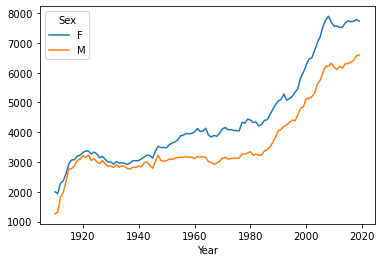

In [37]:
#Number of different names over the decades, by gender
bn = bn.drop(bn.columns[1], axis = 1)
Xtab = pd.crosstab(bn.Year, bn.Sex)
newdf = pd.DataFrame(Xtab.reset_index())
newdf.plot(x= 'Year')

In [53]:
#50 Most named babies in total over the last 109 years
df = bn[['Name','Count']].groupby('Name').sum()
newdf = df.sort_values(by='Count', ascending = False)
most_named = pd.Series(newdf['Count'].values,index=newdf.index).to_dict()
print(newdf.head(50))


              Count
Name               
James        993995
William      728599
Mary         650507
John         618499
Robert       571763
Michael      458335
David        420812
Charles      415385
Christopher  291383
Thomas       288735
Joseph       265806
Elizabeth    226925
Richard      225695
Betty        207528
Willie       205549
George       201891
Linda        200264
Barbara      181794
Joshua       181151
Patricia     178915
Matthew      176450
Sarah        173305
Kenneth      168639
Margaret     168434
Dorothy      166703
Daniel       165915
Jennifer     163542
Larry        150531
Timothy      149286
Donald       148991
Andrew       140998
Anthony      140590
Paul         137021
Brenda       133157
Edward       131301
Ashley       130939
Jessica      130403
Jerry        129470
Samuel       127327
Jonathan     121778
Jason        121546
Kimberly     120980
Martha       120764
Jacob        120541
Shirley      119298
Mark         118853
Steven       117632
Brandon      117176


              Name Sex   Count
6089         James   M  989034
13956      William   M  726093
6699          John   M  615872
11443       Robert   M  569342
9817       Michael   M  456155
3370         David   M  419782
2568       Charles   M  413573
2740   Christopher   M  290190
13153       Thomas   M  288319
6802        Joseph   M  265306
            Name Sex   Count
9520        Mary   F  648166
4225   Elizabeth   F  226808
1646       Betty   F  206953
8714       Linda   F  200041
1491     Barbara   F  181592
10767   Patricia   F  178825
11868      Sarah   F  173186
9326    Margaret   F  168333
3941     Dorothy   F  166371
6500    Jennifer   F  163338


<function matplotlib.pyplot.clf()>

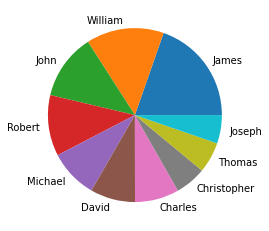

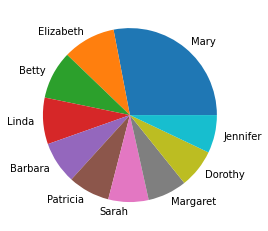

In [90]:
#10 Most Common Boys and Girls Names
bn = pd.read_csv("baby_names.csv")
Name_df = bn.groupby(['Name','Sex'])['Count'].sum().reset_index()
Name_df = Name_df.sort_values(by ='Count',ascending = False)
Common_M = Name_df.query('Sex =="M"')
Common_F = Name_df.query('Sex =="F"')
print(Common_M.head(10))
print(Common_F.head(10))
plt.figure()
plt.pie(data = Common_M[['Name','Count']].head(10), x=Common_M['Count'].head(10), labels=Common_M['Name'].head(10))
plt.legend
plt.show

plt.figure()
plt.pie(data = Common_F[['Name','Count']].head(10), x=Common_F['Count'].head(10), labels=Common_F['Name'].head(10))
plt.legend
plt.show

   Year  Average Name Length
0  1910             5.510776
1  1911             5.523528
2  1912             5.557899
3  1913             5.573624
4  1914             5.578326


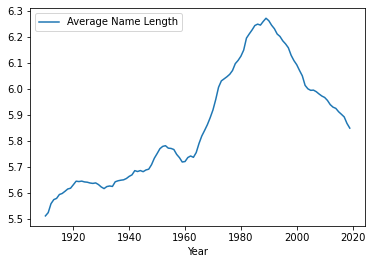

In [41]:
#How has average name length changed by year from 1910 to 2019
newdf = pd.DataFrame(columns=['Year', 'Average Name Length'])
bn['Year'].astype(int)
for y in range(1910,2020):
    temp_df = bn.loc[bn['Year'] == y].copy()
    temp_df['combined_count'] = temp_df['Count'] * temp_df.Name.apply(len)
    avg = sum(temp_df['combined_count']) / sum(temp_df['Count'])
    newdf.loc[newdf.shape[0]] = [y,avg]

newdf['Year'] = newdf['Year'].astype(np.int64)
newdf.plot(x = 'Year')
#You can sort by length with the code below if wanted
#newdf = newdf.sort_values(by = 'Average Name Length', ascending = False)
print(newdf.head(10))
print(newdf.tail(10))


In [42]:
#Create a text file containing every name in the dataframe, and make a wordcloud of the names
bn['Name'].astype(str)
baby_names_list = ""
for name in bn['Name']:
    baby_names_list += name + " " 

#open text file
text_file = open("D:\\Malhar\\Anaconda3\\Malhar\\Data\\Baby Names EDA\\baby_names_list.txt", "w")
 
#write string to file
n = text_file.write(baby_names_list)
 
#close file
text_file.close()

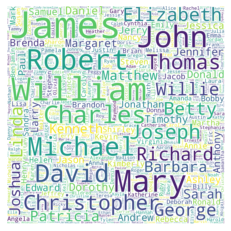

In [54]:
#Make a wordcloud of the top names based on frequency
wc = WordCloud(background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=1500, height=1500)
wc.generate_from_frequencies(most_named)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()